# EXPLORATORY DATA ANALYSIS
## Finding the average birth weight for babies in the U.S.

1) explore the data
2) clean and validate
3) filter and visualize
        

## 1. Exploring the data

In [1]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt

In [2]:
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')
pd.set_option('max_rows', None)
print(nsfg)

      caseid  outcome  birthwgt_lb1  birthwgt_oz1  prglngth  nbrnaliv  agecon  \
0      60418        1           5.0           4.0        40       1.0    2000   
1      60418        1           4.0          12.0        36       1.0    2291   
2      60418        1           5.0           4.0        36       1.0    3241   
3      60419        6           NaN           NaN        33       NaN    3650   
4      60420        1           8.0          13.0        41       1.0    2191   
5      60420        4           NaN           NaN         3       NaN    3391   
6      60423        1           5.0           0.0        35       1.0    2366   
7      60423        1           6.0           2.0        35       1.0    2866   
8      60426        4           NaN           NaN        11       NaN    3241   
9      60426        1           8.0          10.0        39       1.0    3391   
10     60430        1           6.0           7.0        36       1.0    2133   
11     60430        1       

In [3]:
print(nsfg.shape)

print(nsfg.columns)

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')


## 2. Cleaning and Validating the data
#### a) Replacing missing data with NaN using numpy
#### b) column agecon and agepreg have to be divided by 100 to display the correct age

In [4]:
# adding the weights in pounds and ounces 

ounces = nsfg['birthwgt_oz1']
pounds = nsfg['birthwgt_lb1']

# finding the weight distribution
print(pounds.value_counts().sort_index())

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64


#### The above data indicates that the two values, 98 and 99 have missing values

In [5]:
# let's have a look the means of pounds and ounces
print(pounds.mean())
print(ounces.mean())

8.055204317656129
7.213894539195744


### a) Replacing missing values

In [6]:
# replacing the missing values in pounds with np.nan
pounds = pounds.replace([98,99], np.nan)

In [7]:
pounds.mean()

6.703286384976526

#### We can see that the mean has changed (check the prev mean in cell 5)

In [8]:
ounces.replace([98, 99], np.nan, inplace = True)

In [9]:
ounces

0        4.0
1       12.0
2        4.0
3        NaN
4       13.0
5        NaN
6        0.0
7        2.0
8        NaN
9       10.0
10       7.0
11       6.0
12       NaN
13       NaN
14       8.0
15       8.0
16       6.0
17       8.0
18       NaN
19       NaN
20       8.0
21       NaN
22       4.0
23       7.0
24       NaN
25       8.0
26       0.0
27       NaN
28      13.0
29      10.0
30       7.0
31       7.0
32      14.0
33       6.0
34       NaN
35       6.0
36       3.0
37       3.0
38       4.0
39       5.0
40      15.0
41       9.0
42       8.0
43       NaN
44       4.0
45       7.0
46       5.0
47       0.0
48       9.0
49      14.0
50       NaN
51       NaN
52      11.0
53       5.0
54       NaN
55       4.0
56      11.0
57       NaN
58      11.0
59       5.0
60      10.0
61       2.0
62       NaN
63       2.0
64      11.0
65      11.0
66       8.0
67       NaN
68       NaN
69       NaN
70       NaN
71       NaN
72       NaN
73       7.0
74       6.0
75       0.0
76       0.0

In [10]:
ounces.mean()

6.694099134539733

In [11]:
# total weight
birth_weight = pounds + ounces /16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

#### Column 'nbrnaliv' (column which tells whether a livebirth took place or not) has a value 8. Let's replace it with NaN

In [12]:
print(nsfg['nbrnaliv'].value_counts())
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64
1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


### b) Displaying the correct age

In [13]:
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100
preg_length = agepreg - agecon
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## 3) Visualizing the data

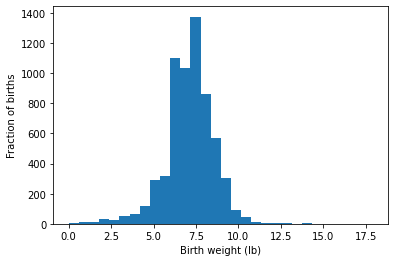

In [14]:
plt.hist(birth_weight.dropna(), bins = 30)
plt.xlabel("Birth weight (lb)")
plt.ylabel("Fraction of births")
plt.show()

In [15]:
preterm = nsfg['prglngth'] < 37
print(preterm.sum())

# mean will tell us how many fraction of births in the dataset are preterm
print(preterm.mean())

3742
0.39987176747168196


In [16]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [17]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

### The distribution of weight is also different for multiple births, like twins and triplets.

In [20]:
# full_term = nsfg['prglngth'] >= 37
single = nsfg['nbrnaliv'] == 1
single_full_term_weight = birth_weight[full_term & single]
print("Single full-term mean:", single_full_term_weight.mean())
mult_full_term_weight = birth_weight[full_term & ~single]
print("Multiple full-term mean:", mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556
